# **Music Recommendation System**

# **Milestone 1**

## **Problem Definition**

**The context** - Why is this problem important to solve?<br>
**The objectives** - What is the intended goal?<br>
**The key questions** - What are the key questions that need to be answered?<br>
**The problem formulation** - What is it that we are trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name and the year of release. Second file contains the user id, song id and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Importing Libraries and the Dataset**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse.linalg import svds

from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.sparse import csr_matrix

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import csv
count_df = pd.read_csv('/content/drive/MyDrive/MIT/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/MIT/song_data.csv')


### **Overview of the Data**

### **Understanding the data by viewing a few observations**

In [ ]:
#View first 10 rows of the count_df dataframe
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
#View first 10 rows of the song_df dataframe
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and missing values of each column**

In [ ]:
#Check the datatypes of each column of the count_df dataframe. Hint: Use info() method
print("Datatypes of each column: ")
count_df.info()
print("\n")
print("Missing values of each column: ")
count_df.isnull().sum()

Datatypes of each column: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


Missing values of each column: 


Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [ ]:
#Check the data types of each column of the song_df dataframe. Hint: Use info() method
print("Datatypes of each column: ")
song_df.info()
print("\n")
print("Missing values of each column: ")
song_df.isnull().sum()

Datatypes of each column: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


Missing values of each column: 


song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

#### **Observations and Insights:**
- From count_df dataset we identify 2 columns with "Object" data type and 1 column with "Int64" data type.
- From song_df dataset we identify 4 columns with "Object" data type and 1 columna with "Int64" data type.
- There are 15 missing values in column "Title" and 5 missing values in the case of "release" column.
- Those 15 missing values of "title" column will not impact the recommedation model, because we have the song id that makes reference for a unique song. 


In [ ]:
#Rows duplicated in dataset "song_df" based on column "song_id"
duplicated_songid= song_df[song_df.duplicated(subset=['song_id'])]
print(duplicated_songid)

                   song_id  ...  year
18309   SOPFBUZ12AF729C896  ...  2003
32760   SOJHKXX12A8C139798  ...  2004
33033   SOLTAEJ12A8C13F793  ...  2005
49718   SONEJDQ12A6D4FA71C  ...  1998
54218   SONVJUL12A6701FB7A  ...  2005
...                    ...  ...   ...
997476  SOCGXXL12B0B808865  ...  1991
998785  SOEUIVS12A8C1400E3  ...  1992
999365  SORANLE12A6310DBC8  ...     0
999643  SOAPUFN12AB017FF03  ...  1998
999740  SODNVTM12A6D4FA448  ...     0

[944 rows x 5 columns]


In [ ]:
#Drop rows duplicated based on column "song_id"
song_df1 = song_df.drop_duplicates(subset=['song_id'])

In [ ]:
#Verify if we still have song_id values duplicated
duplicated_songid2= song_df1[song_df1.duplicated(subset=['song_id'])]
print(duplicated_songid2)

Empty DataFrame
Columns: [song_id, title, release, artist_name, year]
Index: []


Since both the datasets have the column song_id, we can merge these datasets using this column.

In [ ]:
df = pd.merge(count_df, song_df1.drop_duplicates(['song_id']), on=None, how="left")
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** The user_id and the song_id are encrypted and these encryptions do not provide information about the user or the song. Can we transform these variables using label encoding to ease the processing?

In [ ]:
le = LabelEncoder()

df['user_id'] = le.fit_transform(df['user_id'])

In [ ]:
#Similarly, do the label encoding for the song_id column
le = LabelEncoder()

df['song_id'] = le.fit_transform(df['song_id'])

In [ ]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
#After merge both song_df and count_df we still have missing values?
df.isnull().sum()

user_id        0
song_id        0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

**Observations**
- A machine learning agorithm understand numbers no text, so it is necessary to transform our variables "user_id" and "song_id" using label econding.
- After the merging of both databases (song_df and count_df) we no longer have null values.

**Think About It:** What does it mean for the value of year being 0? Would it affect the recommendations? 

- A year with "0" value, in general the year may not be a useful feature for building recommendation systems. But for EDA, the year of release of the album or song will be unknown.

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

In [ ]:
#Check the total number of unique user id. Hint: Use nunique() method
df['user_id'].nunique()

76353

In [ ]:
#Check the total number of unique song id. Hint: Use nunique() method
df['song_id'].nunique()

10000

In [ ]:
#Check the total number of unique artist_name. Hint: Use nunique() method
df['artist_name'].nunique()

3375

#### **Observations and Insights:**
- It seems that most of the users have the same song's preference.
- It is a possibility that the dataset contains a list of artist with more than one song.
- It is interesting that the artists are quite repetitive for the large number of registered users, it seems that users share musical preferences both by artist and even by musical genre. 

### **Let's find out about the most interacted songs and interacted users**

In [ ]:
#Check the most interacted songs by using the title column. Hint: Use value_counts() method
df['title'].value_counts().to_frame()

,title
Sehr kosmisch,8277
Undo,7032
Dog Days Are Over (Radio Edit),6949
You're The One,6729
Revelry,6145
...,...
Scared,51
Historia Del Portero,51
Don´t Leave Me Now,50
No Creo En El Jamas,48


In [ ]:

#Which user interacted the most with any song in the dataset?
df['user_id'].value_counts().to_frame()

,user_id
32542,711
75144,643
23297,556
10807,540
7834,533
...,...
55414,1
33817,1
31640,1
17509,1


In [ ]:
#Check the most interacted artist
df['artist_name'].value_counts().to_frame()

,artist_name
Coldplay,29422
The Black Keys,19862
Kings Of Leon,18747
Florence + The Machine,18112
Jack Johnson,17801
...,...
Shotta,54
The Four Seasons,52
Ricardo Montaner,52
Umphrey's McGee,52


#### **Observations and Insights: **
- The most interacted song is "Sehr kosmisch",this song has been selected about 8277 times, it seems to be the most popular song for users.
- There ar a possibility of 76353-8277 = 68076 more interactions as we have 76353 unique users in our dataset.
- The user who has interacted with more songs or has used more frequently the platform is user number "32542".
- It is also interesting to know the most interacted artist, is this case is "Coldplay", at least once a "X" song by this artist have been selected by a user.
- Both the song and the artist that has interacted the most with users could be a reference for a potential recommendation for future or current users.
- It could happen that future recommendations will be influenced by the high interaction of the user "32542", since it is a possibility that he is the user who has selected the greatest variety of songs. (not repeated songs)

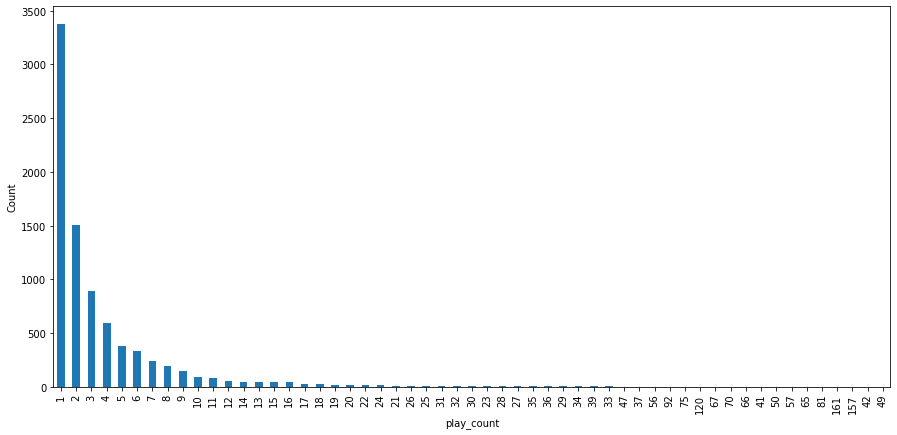

In [ ]:
#Number of times that the most interated song "Sehr kosmisch" was played once, two times, etc by users.
plt.figure(figsize=(15,7))
df[df['title']=='Sehr kosmisch']['play_count'].value_counts().plot(kind='bar')
plt.xlabel('play_count')
plt.ylabel('Count')
plt.show()

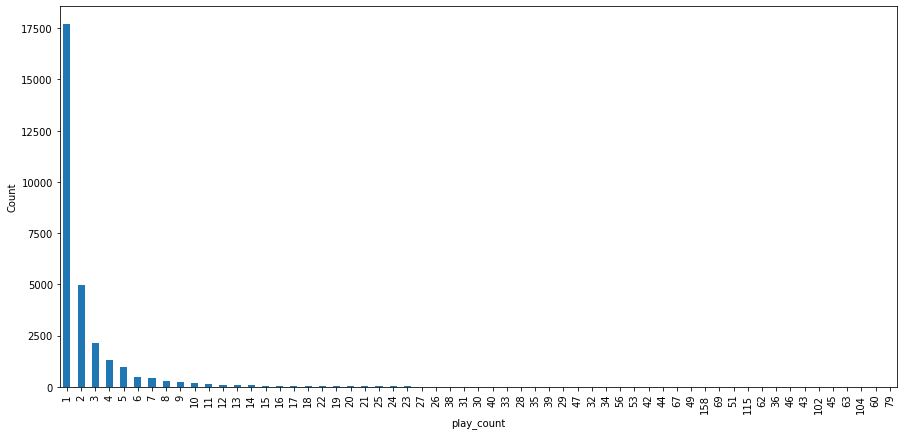

In [ ]:
#Number of times that the most interacted artist "Coldplay" was played once, two times, etc by users.
plt.figure(figsize=(15,7))
df[df['artist_name']=='Coldplay']['play_count'].value_counts().plot(kind='bar')
plt.xlabel('play_count')
plt.ylabel('Count')
plt.show()

**Comments**
- Almost 3500 times the song "Sehr kosmisch" was played and less or equal to 1500 times, was played more than two times. We could say that al least 3400 users have played once the song, but this is not enough information to conclude that the song "Sehr kosmisch" will be a future recommendation.

####**Observations:**

**Think About It:** What other information can be extracted from this data? Try to explore the data. For example, we can find how the count of songs played has changed over the years. 

In [ ]:
#Songs releasing per year
count_songs = df.groupby('year').count()['song_id']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

,song_id
year,
2006,123331
2007,162573
2008,166788
2009,179168
2010,66914


 **Comment:**
 There is not a constant growth from year to year, but there is a general increase in the number of songs from 1954 to 2009.

In [ ]:
#Number of times a song (ordered by title) was played 
df_songs = df.groupby('title')
count_plays = df_songs['play_count'].sum()
sum_plays = pd.DataFrame(count_plays).sort_values(by=['play_count'], ascending=False)
sum_plays

,play_count
title,
You're The One,54915
Undo,49253
Revelry,41418
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile),31153
Sehr kosmisch,31036
...,...
Summer In Dixie (LP Version),76
Slan Le Maige,75
Robot Rock (Soulwax Remix),73


In [ ]:
#Count of songs listened/played only once, twice, etc
count_songs = df.groupby('play_count').count()['song_id']
count = pd.DataFrame(count_songs)
count

,song_id
play_count,
1,1138433
2,313043
3,142933
4,82569
5,93136
...,...
683,1
796,1
879,1


**Comment:**
- It is interesting that the most interacted song "Sehr kosmisch" has less plays / reproductions than the song "You are the one", so it is possible that few users have played the song "You are the one" several times. 
- Could be a possibility that songs played more than once are more likely to be recommended, compared to songs played only once.
- It is observed that there are some cases in which an unique song has been played many times by, probably, different users, this leads us to think that this song can also be easily recommended.

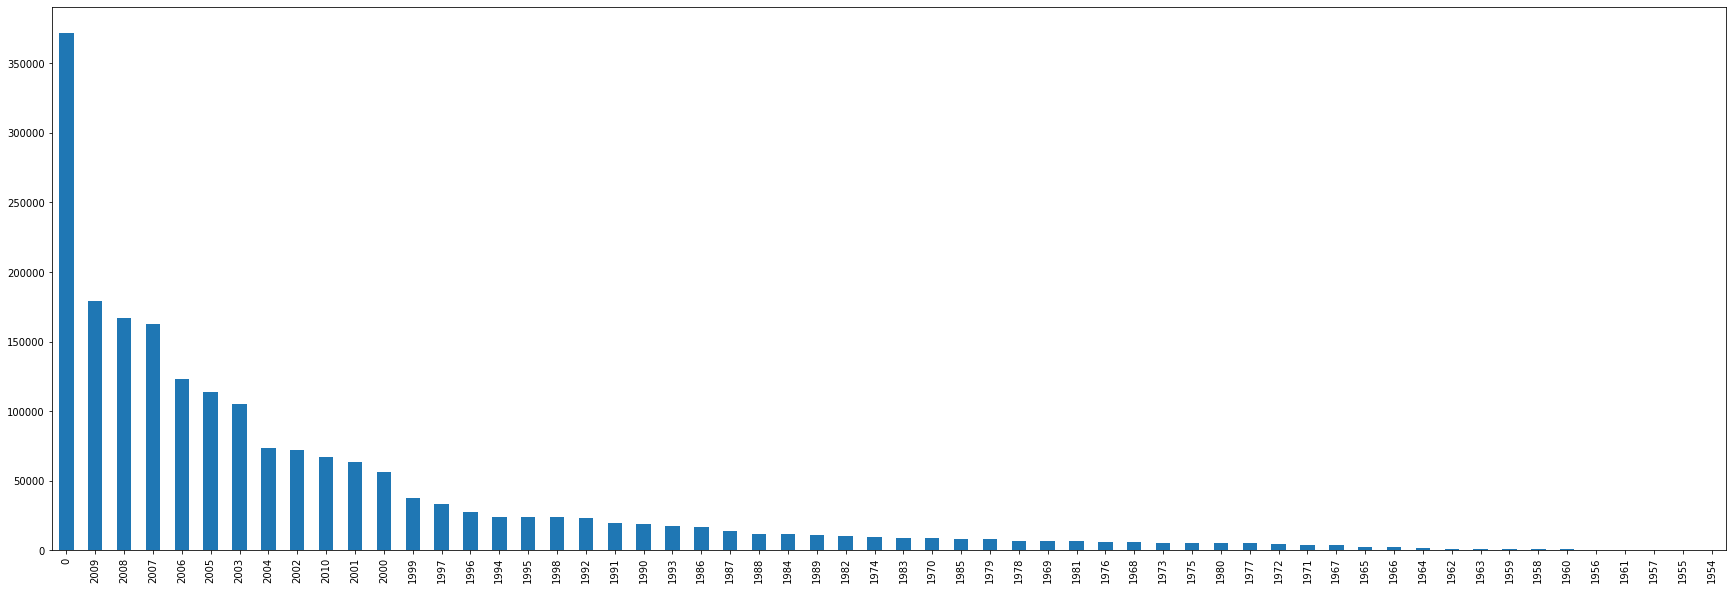

In [ ]:
#Plot a barplot to visualize the count of songs released per year
plt.figure(figsize=(30,10))
#sns.barplot(x = count.index,y='title',data=count,estimator = np.median)
df['year'].value_counts().plot(kind='bar')

#### **Observations and Insights: **
- As mentioned above, the "year" column will not impact the building of the recommender system model. However, it is observed that 18.6% of the total number of rows corresponds to the value of year "0" and holds the highest number of released songs.
- The highlight of visualizing the number of songs published per year is that there is an increasing behavior from 1954 to 2010, which leads that the user will has, year after year, more options to play. And a greater challenge for the platform to be able to match the recommendations to the users.
- It is possible to drop "title" column 


## **Proposed approach**
**Potential techniques** - What different techniques should be explored?<br>
**Overall solution design** - What is the potential solution design?<br>
**Measures of success**- What are the key measures of success?<br>

##**Milestone 2**

Now that we have explored the data, let's apply different algorithms to build recommendation systems

**Popularity - Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems on the basis of the sum of play counts

In [ ]:
play_count = df.groupby('title').count()['play_count']
play_count.head()

title
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version)     78
#40                                                               338
& Down                                                            373
' Cello Song                                                      103
'97 Bonnie & Clyde                                                 93
Name: play_count, dtype: int64

In [ ]:
sum_play_count = df.groupby('title')
sum_play_count2 = sum_play_count['play_count'].sum()
sum_play_count2.head()

title
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version)     148
#40                                                               1831
& Down                                                             739
' Cello Song                                                       254
'97 Bonnie & Clyde                                                 140
Name: play_count, dtype: int64

In [ ]:
final = pd.DataFrame({'play_count': play_count, 'sum_play_count2': sum_play_count2})#.sort_values(by=['sum_play_count2'],ascending = False)
final

,play_count,sum_play_count2
title,,
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version),78,148
#40,338,1831
& Down,373,739
' Cello Song,103,254
'97 Bonnie & Clyde,93,140
...,...,...
the Love Song,70,279
you were there with me,79,89
¡Viva La Gloria! (Album Version),171,538


In [ ]:
#Build a function for finding top n songs
def top_n_songs(data,n,min_interactions=100):
    recommendations = data[data['play_count'] > min_interactions]
    recommendations = recommendations.sort_values(by='sum_play_count2',ascending= False)
    return recommendations.index[:n]


In [ ]:
list(top_n_songs(final,5,60))

["You're The One",
 'Undo',
 'Revelry',
 'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
 'Sehr kosmisch']

In [ ]:
list(top_n_songs(final,5,100))

["You're The One",
 'Undo',
 'Revelry',
 'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
 'Sehr kosmisch']

In [ ]:
list(top_n_songs(final,5,300))

["You're The One",
 'Undo',
 'Revelry',
 'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
 'Sehr kosmisch']

**Observations and Insights:**
- For cases as "New item" or "New user", elaborate a popularity or rank based recommendation system, allows to identify the "top_n_items". In our case, we identified that the songs recommended are the same fo every user. The results are no varying with the min_interation value, because the top songs have the highest play_count and hence smaller values for min_interation are not affecting the output.

##**Similarity-Based Collaborative Filtering**

**Think about it:** To build the similarity based collaborative filtering, we need to create user-item interactions matrix. Since this dataset is very big, the interaction matrix will be sparse. Can we create a shorter version of this dataset by filtering top 5000 most played songs and top 5000 users who has interacted the most? What would be the benefits of doing so?

In [ ]:
#Find IDs of Top 5000 songs
top_5000_songs = pd.DataFrame({'song_id':df['song_id'].value_counts()[:5000].index})
top_5000_songs.head()

,song_id
0,2220
1,317
2,352
3,614
4,7416


In [ ]:
#Find IDs of Top 5000 users who has interacted the most
top_5000_users = pd.DataFrame({'user_id':df[df['song_id'].isin(top_5000_songs['song_id'])]['user_id'].value_counts()[:5000].index})
top_5000_users.head()

,user_id
0,75144
1,32542
2,61472
3,10807
4,31704


In [ ]:
#Filter the original data to contain only the top 5000 songs
df_small1 = top_5000_songs.merge(df, how='inner', on='song_id')
df_small1

,song_id,user_id,play_count,title,release,artist_name,year
0,2220,54961,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
1,2220,66678,3,Sehr kosmisch,Musik von Harmonia,Harmonia,0
2,2220,70730,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
3,2220,56576,2,Sehr kosmisch,Musik von Harmonia,Harmonia,0
4,2220,3204,2,Sehr kosmisch,Musik von Harmonia,Harmonia,0
...,...,...,...,...,...,...,...
1547956,8128,34194,1,People Of The Sun,Evil Empire,Rage Against The Machine,1994
1547957,8128,56263,1,People Of The Sun,Evil Empire,Rage Against The Machine,1994
1547958,8128,42258,8,People Of The Sun,Evil Empire,Rage Against The Machine,1994
1547959,8128,12738,1,People Of The Sun,Evil Empire,Rage Against The Machine,1994


In [ ]:
#Filter the data with top 5000 songs to contain only top 5000 users
df_small = top_5000_users.merge(df_small1, how='inner', on='user_id')
df_small

,user_id,song_id,play_count,title,release,artist_name,year
0,75144,7416,1,Revelry,Only By The Night,Kings Of Leon,2008
1,75144,8582,4,Use Somebody,Use Somebody,Kings Of Leon,2008
2,75144,4152,2,The Scientist,The Scientist,Coldplay,2002
3,75144,1118,7,Clocks,A Rush Of Blood To The Head,Coldplay,2002
4,75144,7103,1,Alejandro,The Fame Monster,Lady GaGa,2009
...,...,...,...,...,...,...,...
461703,70931,8506,5,The Widow,Frances the Mute,The Mars Volta,2004
461704,70931,8064,4,Inertiatic Esp,Deloused in the Comatorium,The Mars Volta,2003
461705,70931,1712,3,Eriatarka,Deloused in the Comatorium,The Mars Volta,2003
461706,70931,2259,5,Found Out,Swim,Caribou,2010


In [ ]:
interactions_matrix = df_small.pivot(index = 'user_id', columns = 'song_id', values= 'play_count') #Use the smaller version of the original data to compute interaction matrix  
interactions_matrix

song_id,1,4,5,11,14,15,16,17,20,21,22,23,24,30,32,36,40,41,42,47,48,50,51,52,54,57,58,62,64,66,70,71,72,74,79,83,84,85,86,87,...,9913,9914,9916,9917,9925,9926,9928,9929,9931,9933,9934,9936,9938,9939,9940,9941,9942,9944,9949,9952,9954,9957,9958,9959,9960,9961,9964,9965,9966,9973,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76300,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations and insights:**
- It was necessary to build a smaller dataset based on the top 5000 songs and users that have interacted the most according to our original data.
- Choosing the songs and users that have interacted the most, allows us to make better recommendations for users as opposed to choosing a random sample. 

In [ ]:
# Replace the missing values in the interactions_matrix with 0 values.
interactions_matrix.fillna(0, inplace=True)
interactions_matrix.head()

song_id,1,4,5,11,14,15,16,17,20,21,22,23,24,30,32,36,40,41,42,47,48,50,51,52,54,57,58,62,64,66,70,71,72,74,79,83,84,85,86,87,...,9913,9914,9916,9917,9925,9926,9928,9929,9931,9933,9934,9936,9938,9939,9940,9941,9942,9944,9949,9952,9954,9957,9958,9959,9960,9961,9964,9965,9966,9973,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, let's create a **function to find similar users and similarity scores for given user_id and interaction matrix**

In [ ]:
def similar_users(user_id, interactions_matrix):
    similarity = [] 
    for user in interactions_matrix.index:
        
        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_id]], [interactions_matrix.loc[user]])
        
        #Appending the user and the corresponding similarity of plays with user_id as a tuple 
        similarity.append((user, sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)   #Sorting the list on the basis of similarity scores
    
    most_similar_users = [tup[0] for tup in similarity] #Extracting the user from each tuple in the sorted list
    
    similarity_plays = [tup[1] for tup in similarity]   #Extracting the similarity score from each tuple in the sorted list
    
    most_similar_users.remove(user_id)                  #Removing the original user and keeping only other similar users       
    similarity_plays.remove(similarity_plays[0])
       
    return most_similar_users, similarity_plays

In [ ]:
# Use the above function to find out the top 10 similar users to the user_id 75144 
similar_users(75144, interactions_matrix)[0][:10]

[31704, 75383, 6035, 6240, 13576, 20132, 23532, 72644, 64613, 14310]

In [ ]:
# Find the level of similarity between similar users and the user with user_id 75144
similar_users(75144, interactions_matrix)[1][:10]

[array([[0.50662976]]),
 array([[0.41211188]]),
 array([[0.395076]]),
 array([[0.3832315]]),
 array([[0.38147089]]),
 array([[0.38109146]]),
 array([[0.37964508]]),
 array([[0.37521082]]),
 array([[0.35609382]]),
 array([[0.35040026]])]

In [ ]:
# Finding out top 10 similar users to the user_id 57 
similar_users(57, interactions_matrix)[0][:10]

[31663, 47974, 75434, 22875, 14387, 69199, 29079, 69176, 53760, 61329]

In [ ]:
# Find the level of similarity between similar users and the user with user_id 57
similar_users(57, interactions_matrix)[1][:10]

[array([[0.22797189]]),
 array([[0.22506204]]),
 array([[0.22083372]]),
 array([[0.2083729]]),
 array([[0.18120773]]),
 array([[0.17721826]]),
 array([[0.17431987]]),
 array([[0.1678447]]),
 array([[0.16645327]]),
 array([[0.16592726]])]

**Observations:**
- We have two examples: finding out top 10 similar users to the user with most interactions "75144" and with the user with less interactions "70931", both from our dataframe "top_5000_users". 
- In order to build a more robust similar user identification, it is possible to define a threshold of level of similarity, for example if our threshold is 0.3, then there will no be users similar with user "57".So in that case, we can recommend the most popular songs.
- If the value of the theta is near 1 then it is most similar and if it is near to "0" then it is least similar.

**Think About It:** We found similar users for a given user but how do we find which songs to recommend to a particular user?

In [ ]:
#Build a function to recommend songs to users
def recommendations(user_id, num_of_songs, interactions_matrix,df_small):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_id, interactions_matrix)[0]  
    
    #Finding song IDs with which the user_id has interacted
    song_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_id] > 0)]))
    recommendations = []
    
    observed_interactions = song_ids.copy()
    for sim_user in most_similar_users:
        if len(recommendations) < num_of_songs:
            #Finding 'n' songs which have been played by similar users but not by the user_id
            similar_user_song_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[sim_user] > 0)]))
            recommendations.extend(list(similar_user_song_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_song_ids)
        else:
            break
    songs_names = df_small[df_small['song_id'].isin(recommendations[:num_of_songs])]['title'].unique()
    return songs_names #recommendations[:num_of_songs]

In [ ]:
#Recommend 5 songs to the user 75144 using the function defined above
recommendations(75144, 5, interactions_matrix,df_small)

array(['LoveStoned/I Think She Knows', 'Sweet Talk', 'Sample Track 2',
       'What Goes Around...Comes Around', 'Back To Black'], dtype=object)

In [ ]:
#Recommend 5 songs to the user 57 using the function defined above
recommendations(57, 5, interactions_matrix,df_small)

array(['Paper Gangsta', 'Boys Boys Boys', 'X & Y', "It's Like That",
       'Work (Explicit)'], dtype=object)

**Observations and Insights:**
- My recommendations function will find 'n' songs which have been played by similar users in order to recommend those songs to other user.
- For user_id "75144" and "57" , we have differents recommended songs.
- An user gets recommendations to those songs that he/her has not played before.

##**Model-Based Collaborative Filtering: Singular Value Decomposition**

Now, we will apply SVD and use latent features to find recommendations for each user.

In [ ]:
u, s, vt = np.linalg.svd(interactions_matrix, full_matrices=False) #Hint: use np.linalg.svd() function

In [ ]:
#shapes of all the matrices
print(u.shape) #U MATRIX: m x k where, m is the number of users and k is number of latent features
print(s.shape) #Sigma: k x k matrix, where k is number of latente features
print(vt.shape) #V transpose matrix: k is the number of latent features and n is the number of songs 

(5000, 5000)
(5000,)
(5000, 5000)


Now, we need to find the appropriate K (the number of latent features) to use in order to re-generate the interaction matrix and make predictions. We will **split the data into train and test data and make predictions for different value of K.** We will choose the K which gives good performance on the train and test data.

In [ ]:
#Split the data
X_train, X_test = train_test_split(df_small, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(369366, 7)
(92342, 7)


In [ ]:
#Let's create the train and test interactions matrices
interactions_matrix_train = X_train.pivot(index='user_id', columns='song_id', values='play_count')
interactions_matrix_train.fillna(0, inplace=True)
interactions_matrix_train

song_id,1,4,5,11,14,15,16,17,20,21,22,23,24,30,32,36,40,41,42,47,48,50,51,52,54,57,58,62,64,66,70,71,72,74,79,83,84,85,86,87,...,9913,9914,9916,9917,9925,9926,9928,9929,9931,9933,9934,9936,9938,9939,9940,9941,9942,9944,9949,9952,9954,9957,9958,9959,9960,9961,9964,9965,9966,9973,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76300,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
interactions_matrix_test = X_test.pivot(index='user_id', columns='song_id', values='play_count')
interactions_matrix_test.fillna(0, inplace=True)
interactions_matrix_test

song_id,1,4,5,11,14,15,16,17,20,21,22,23,24,30,32,36,40,41,42,47,48,50,51,52,54,57,58,62,64,66,70,71,72,74,79,83,84,85,86,87,...,9913,9914,9916,9917,9925,9926,9928,9929,9931,9933,9934,9936,9938,9939,9940,9941,9942,9944,9949,9952,9954,9957,9958,9959,9960,9961,9964,9965,9966,9973,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can use the interactions matrix of the train data to find U, S, and V transpose using SVD. Then find the subset of rows in the interactions matrix of the test data which we can predict using this matrix decomposition with different numbers of latent features.

In [ ]:
#Common users in train a test data
train_users = set(interactions_matrix_train.index)
test_users = set(interactions_matrix_test.index)
match_users = train_users & test_users

In [ ]:
#Common users in train a test data
train_songs = set(interactions_matrix_train.columns)
test_songs = set(interactions_matrix_test.columns)
match_songs = train_songs & test_songs

In [ ]:
interactions_matrix_test = interactions_matrix_test.loc[match_users, match_songs]
interactions_matrix_test.shape

(5000, 4994)

Descompose the **interacions_matrix_train and find the U and Vt for the test data** using the common users and songs in the train and test data.

In [ ]:
#Applying SVD
u_train, s_train, vt_train = np.linalg.svd(interactions_matrix_train, full_matrices=False)

In [ ]:
#Finding u_test and vt_test matrices using u_train, vt_train and common user/businesses in train and test data
rows = interactions_matrix_train.index.isin(test_users)
cols = interactions_matrix_train.columns.isin(test_songs)
u_test = u_train[rows, :]
vt_test = vt_train[:, cols]

We have calculated U and Vt matrices for the train as well as test data. **Now, we need to find the number of latent features that give us the lowest RMSE on the train and the test data.**

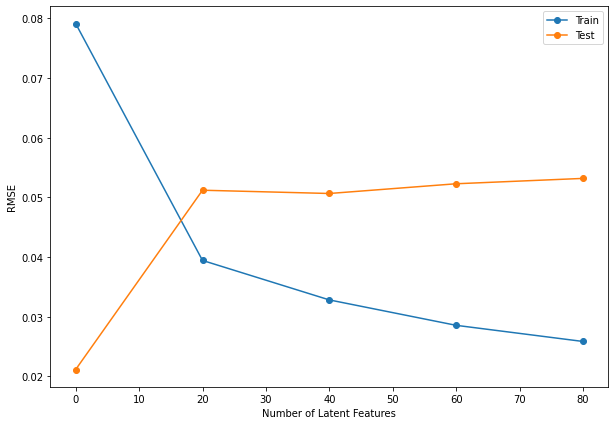

In [ ]:
#Choose the best K - number of latent features
latent_features = np.arange(0, 100, 20) 
train_error = []
test_error = []

for k in latent_features:
    #Slicing the U, S, and Vt matrices to get k latent features from train and test data 
    s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]
    
    #Regenerating train and test interaction matrices using k latent features
    interactions_matrix_train_preds = np.around(np.matmul(np.matmul(u_train_lat, s_train_lat), vt_train_lat))
    interactions_matrix_test_preds = np.around(np.matmul(np.matmul(u_test_lat, s_train_lat), vt_test_lat))
    
    #Calculating the actual and predicted average of plays for each song in the training data
    avg_plays_train = interactions_matrix_train.mean(axis=0)
    avg_plays_train_pred = interactions_matrix_train_preds.mean(axis=0)
    
    #Calculating the actual and predicted average of plays for each song in the test data
    avg_plays_test = interactions_matrix_test.mean(axis=0)
    avg_plays_test_pred = interactions_matrix_test_preds.mean(axis=0)
    
    #Calculating train and test RMSE
    train_rmse = mean_squared_error(avg_plays_train, avg_plays_train_pred, squared=False)
    test_rmse = mean_squared_error(avg_plays_test, avg_plays_test_pred, squared=False)
    
    train_error.append(train_rmse)
    test_error.append(test_rmse)
    
#Plotting train and test RMSE
plt.figure(figsize=(10,7))
plt.plot(latent_features, train_error, label='Train', marker='o');
plt.plot(latent_features, test_error, label='Test', marker='o');
plt.xlabel('Number of Latent Features');
plt.ylabel('RMSE');
plt.legend();

**Observations and Insights:** 
- From our interactions_matrix (5000 x 5000 shape) we applied SVD in order to decompose the initial matrix. This allows us work with latent features, in every dataset we can identify groups of features.
- In order to re-gerate the interaction_matrix and make predictions, it is neccesary to split the dataset into train and test data. 
- train and test RMSE values are quite close for the number of latent Features = 18 .


Let us now reconstruct the matrices using the number of latent features selected above

In [ ]:
s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:18]), u_train[:, :18], vt_train[:18, :]
u_test_lat, vt_test_lat = u_test[:, :18], vt_test[:18, :]

In [ ]:
interactions_matrix_train_preds = np.around(np.matmul(np.matmul(u_train_lat, s_train_lat), vt_train_lat))
interactions_matrix_test_preds = np.around(np.matmul(np.matmul(u_test_lat, s_train_lat), vt_test_lat))

In [ ]:
interactions_matrix_train_preds.shape

(5000, 5000)

In [ ]:
interactions_matrix_test_preds.shape

(5000, 4994)

**Now, let's recreate the original interaction matrix with the same number of latent features and create a function to recommend the top songs**


In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(interactions_matrix, k =18) 

# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [ ]:
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(5000, 18)
(18, 18)
(18, 5000)


**Now, let's regenerate the original matrix using U, Sigma, and Vt matrices. The resulting matrix would be the predicted ratings for all users and products**

In [ ]:
all_user_predicted_counts = np.dot(np.dot(U, sigma), Vt) 

# Predicted plays
preds_df = pd.DataFrame(abs(all_user_predicted_counts), columns = interactions_matrix.columns)#, index=interactions_matrix.index)
preds_df.head()

song_id,1,4,5,11,14,15,16,17,20,21,22,23,24,30,32,36,40,41,42,47,48,50,51,52,54,57,58,62,64,66,70,71,72,74,79,83,84,85,86,87,...,9913,9914,9916,9917,9925,9926,9928,9929,9931,9933,9934,9936,9938,9939,9940,9941,9942,9944,9949,9952,9954,9957,9958,9959,9960,9961,9964,9965,9966,9973,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
0,0.002465,0.000886,0.002736,0.001166,0.000454,0.000574,0.003405,0.001293,0.001987,0.011975,0.001628,0.000294,0.001424,0.001287,0.002998,0.001759,0.000582,0.003353,0.001281,0.000789,0.003040,0.004312,0.001251,0.002898,0.002282,0.000244,0.010279,0.000654,0.001053,0.000109,0.001101,0.003640,0.000631,0.001307,0.003539,0.001794,0.000577,0.000338,0.001410,0.002133,...,0.003137,0.001201,0.001123,0.001102,0.001528,0.000428,0.001130,0.003224,0.030741,0.000806,0.000641,0.000928,0.000562,0.020620,0.000767,0.001266,0.004958,0.001009,0.000416,0.000346,0.001099,0.000196,0.001011,0.000229,0.002189,0.001072,0.001664,0.001198,0.000505,0.000475,0.001329,0.002372,0.007617,0.001158,0.000992,0.001848,0.000282,0.003081,0.000872,0.000342
1,0.003076,0.002005,0.002586,0.001409,0.001061,0.000141,0.005402,0.004149,0.003855,0.024722,0.007295,0.000471,0.002273,0.003977,0.005420,0.004337,0.001919,0.005142,0.005490,0.001102,0.007240,0.015030,0.001578,0.070764,0.005011,0.001240,0.016742,0.007003,0.000377,0.000285,0.001836,0.003999,0.001103,0.002138,0.006551,0.007409,0.000649,0.001074,0.001749,0.006653,...,0.008612,0.002637,0.000170,0.001570,0.004751,0.000449,0.003534,0.005915,0.080700,0.001591,0.001557,0.002575,0.002017,0.030859,0.000974,0.001605,0.001132,0.001663,0.001261,0.000472,0.002725,0.000621,0.001674,0.000699,0.003741,0.003472,0.003594,0.002691,0.000291,0.001290,0.001402,0.005916,0.013907,0.002009,0.001526,0.002917,0.000381,0.001305,0.002007,0.000311
2,0.054137,0.012863,0.111470,0.014389,0.004004,0.019214,0.044296,0.005878,0.028278,0.192897,0.014670,0.001211,0.030252,0.002458,0.229445,0.012307,0.001703,0.072369,0.008382,0.013769,0.010536,0.019571,0.017242,0.129105,0.036960,0.013077,0.233184,0.069645,0.001939,0.000988,0.002815,0.128728,0.009470,0.025440,0.067941,0.003203,0.009036,0.006519,0.003832,0.014635,...,0.036899,0.012077,0.008614,0.022329,0.007488,0.006174,0.006728,0.049890,0.493532,0.012631,0.003090,0.030977,0.000417,0.684306,0.019193,0.024638,0.611212,0.030092,0.001978,0.010768,0.016622,0.001760,0.023851,0.001532,0.015098,0.000564,0.011509,0.005111,0.006304,0.002965,0.007675,0.016055,0.138559,0.020632,0.021186,0.029016,0.000993,0.124738,0.018070,0.002903
3,0.027463,0.024797,0.034291,0.034980,0.014997,0.014568,0.070537,0.052132,0.075336,0.329932,0.080574,0.009288,0.020562,0.048239,0.253773,0.047299,0.016473,0.049036,0.027181,0.017059,0.082855,0.147264,0.018121,0.814942,0.047759,0.008698,0.133341,0.106620,0.043921,0.002032,0.041359,0.040175,0.009769,0.025710,0.052520,0.062901,0.014694,0.003535,0.041495,0.042795,...,0.089631,0.037610,0.003628,0.031672,0.056158,0.007990,0.038948,0.071748,0.987041,0.014628,0.018911,0.068712,0.021895,0.344017,0.011983,0.028057,0.074029,0.014066,0.016431,0.007913,0.022775,0.009102,0.018859,0.008376,0.069541,0.022224,0.068332,0.033575,0.012643,0.015540,0.042076,0.083315,0.203311,0.019525,0.034201,0.041020,0.011133,0.033704,0.015369,0.009627
4,0.013809,0.005370,0.015804,0.008633,0.003143,0.001145,0.020489,0.009575,0.012452,0.082008,0.018238,0.001766,0.009260,0.009368,0.054790,0.010015,0.005513,0.018038,0.016325,0.004844,0.013357,0.036721,0.006657,0.021927,0.014810,0.003240,0.061376,0.020038,0.005634,0.000779,0.004442,0.020808,0.004949,0.008587,0.023527,0.015678,0.003681,0.001429,0.007111,0.011599,...,0.023545,0.009148,0.001645,0.008137,0.012652,0.002078,0.008384,0.019488,0.185007,0.005508,0.004480,0.005941,0.005035,0.115796,0.004457,0.007867,0.059669,0.005592,0.002643,0.002933,0.009244,0.001174,0.006431,0.001751,0.013803,0.008979,0.028607,0.008461,0.001781,0.003646,0.006952,0.023168,0.045779,0.007453,0.002903,0.011341,0.001290,0.010661,0.005788,0.001704


**We need to create a function to recommend SONGS to the users on the basis of predicted plays for each song.**

In [ ]:
#Build the function to recommend top songs 

def recommend_songs(user_idx, interactions_matrix, preds_df, num_recommendations):
          
    # Get and sort the user's plays from the actual and predicted interaction matrix
    sorted_user_plays = interactions_matrix.loc[user_idx].sort_values(ascending=False)
    sorted_user_predictions_plays = preds_df.loc[user_idx].sort_values(ascending=False)
    
    #Creating a dataframe with actual and predicted plays columns
    temp = pd.concat([sorted_user_plays, sorted_user_predictions_plays], axis=1)
    temp.index.name = 'Recommended Songs'
    temp.columns = ['user_plays', 'user_predictions_plays']
    
    #Filtering the dataframe where actual plays are 0 which implies that the user has not interacted with that song
    temp = temp.loc[temp.user_plays == 0]   
    
    #Recommending songs with top predicted plays
    temp = temp.sort_values('user_predictions_plays', ascending=False)
    print('\nBelow are the recommended songs for user(user_id = {}):\n'.format(user_idx))
    df2=temp.head(num_recommendations)
    return df2
    #print(temp['user_predictions_plays'].head(num_recommendations))

In [ ]:
#Recommend "5" songs to some user using the function defined above
user_index = 57
num_recommendations = 5
recommend = recommend_songs(user_index, interactions_matrix, preds_df,num_recommendations)
recommend


Below are the recommended songs for user(user_id = 57):



,user_plays,user_predictions_plays
Recommended Songs,,
317,0.0,7.268819
614,0.0,6.567583
7416,0.0,5.235319
352,0.0,5.055575
2220,0.0,4.671314


In [ ]:
for i in recommend.index:
    print(df_small['title'][df_small['song_id']==i].unique())

['Undo']
["You're The One"]
['Revelry']
['Dog Days Are Over (Radio Edit)']
['Sehr kosmisch']


In [ ]:
#Create a dataframe containing average actual and average predicted play_counts of the songs and calculate the RMSE
rmse_df = pd.concat([interactions_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_Actual_Plays', 'Avg_Pred_Plays']
rmse_df

,Avg_Actual_Plays,Avg_Pred_Plays
song_id,,
1,0.0392,0.016516
4,0.0204,0.010392
5,0.0474,0.026974
11,0.0350,0.014150
14,0.0114,0.005298
...,...,...
9989,0.0428,0.016258
9992,0.0146,0.004717
9994,0.0278,0.029627


In [ ]:
# Calculating RMSE
RMSE = round((((rmse_df.Avg_Actual_Plays - rmse_df.Avg_Pred_Plays) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.03463 



**Observations and Insights:**
- An advantage of working with collaborative approaches is thata it does not requiere information about users or song.
- Our interactions_matrix, used to built the recommendation_song function, includes the most amount of interactions between users and songs, that is an advantage because the more users interact with items the more new recommendations become accurate. 
- We let the system discover the useful latent features by itself. 
- We identified the top 5 songs recommeded to some user and the number of play predicted for each song.
- The RMSE is quite low "0.0346" which implies that the majority of predicted plays are close to the actual plays. 

##**Clustering-Based Recommendation Systems**

In clustering-based recommendation systems, we explore the similarities and differences in people's song preferences based on how many times users plays different songs. We cluster similar users together and recommend songs to a user based on preferences from other users in the same cluster.

First, let's choose the optimal number of clusters i.e.**K for K-means clustering**

In [ ]:
#Find the best k using the elbow plot

sse = [] #Empty list to store the sum of squared errors for each value of k

for k in range(2, 30, 5):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(interactions_matrix)
    sse.append(kmeans.inertia_)

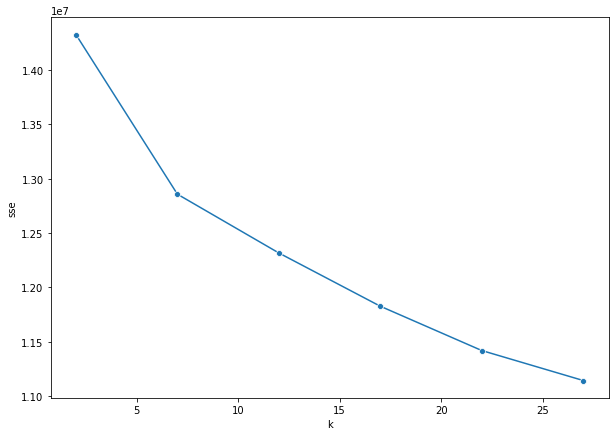

In [ ]:
#Plotting elbow plot

error_data = pd.DataFrame({'k':range(2, 30, 5), 'sse':sse})

plt.figure(figsize=(10,7))

sns.lineplot(x='k', y='sse', data=error_data, marker='o')

plt.show()

- Using the elbow plot, we noticed that there is a sharp decrease in inertia at k=7.

Now, we can create the interaction matrix again using the small version of the original data and fill the NA values within it.

In [ ]:
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,75144,7416,1,Revelry,Only By The Night,Kings Of Leon,2008
1,75144,8582,4,Use Somebody,Use Somebody,Kings Of Leon,2008
2,75144,4152,2,The Scientist,The Scientist,Coldplay,2002
3,75144,1118,7,Clocks,A Rush Of Blood To The Head,Coldplay,2002
4,75144,7103,1,Alejandro,The Fame Monster,Lady GaGa,2009


In [ ]:
interaction_matrix = df_small.pivot(index = 'user_id', columns = 'song_id', values= 'play_count')
#interaction_matrix.fillna(0, inplace=True)
interaction_matrix.head()

song_id,1,4,5,11,14,15,16,17,20,21,22,23,24,30,32,36,40,41,42,47,48,50,51,52,54,57,58,62,64,66,70,71,72,74,79,83,84,85,86,87,...,9913,9914,9916,9917,9925,9926,9928,9929,9931,9933,9934,9936,9938,9939,9940,9941,9942,9944,9949,9952,9954,9957,9958,9959,9960,9961,9964,9965,9966,9973,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's create functions to find the most played songs and the most interacted users

In [ ]:
def find_most_played_songs(interaction_matrix, num_songs):
    #Appending the count of plays for each song as a row in the interaction matrix
    user_song_plays = interaction_matrix.append(interaction_matrix.count(), ignore_index=True)
    
    #Sorting the values in the interaction matrix on the basis of the appended row
    user_song_plays_sorted = user_song_plays.sort_values(user_song_plays.shape[0]-1, axis=1, ascending=False)
    
    #Dropping the appended row from the sorted interaction matrix
    user_song_plays_sorted.drop(user_song_plays_sorted.tail(1).index, inplace=True)
    
    #Selecting top songs with the most number of plays_count
    most_played_songs = user_song_plays_sorted.iloc[:, :num_songs]
    
    return most_played_songs

In [ ]:
#Use the function defined above to find the 30 most played songs
most_played_songs = find_most_played_songs(interaction_matrix, 30)
most_played_songs

song_id,352,2220,5531,8582,7416,317,4152,4448,1118,1334,614,8092,6293,1664,8138,6246,6175,7791,6189,4639,2115,605,2091,7103,6230,9931,4284,952,703,8612
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,19.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,7.0,5.0,3.0,NaN,NaN,1.0,2.0,1.0,3.0,NaN,4.0,NaN,NaN,2.0,NaN,1.0,4.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,2.0,NaN,1.0
4996,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def find_most_interacted_users(most_played_songs, num_users):
    #Finding how many of the top 30 songs have been played by the user 
    most_played_songs['sum_plays'] = pd.Series(most_played_songs.count(axis=1))
    
    #Sorting the dataframe by the new 'sum_plays' columns
    most_played_songs_users = most_played_songs.sort_values('sum_plays', ascending=False)
    
    #Selecting top users with the most number of interactions
    most_played_songs_users_selected = most_played_songs_users.iloc[:num_users, :]
    
    #Dropping the 'sum_plays' column
    most_played_songs_users_selected.drop(['sum_plays'], axis=1, inplace=True)
    
    return most_played_songs_users_selected

In [ ]:
#Use the function defined above to find the 20 most interacted users for 30 most played songs
most_played_songs_users_selected = find_most_interacted_users(most_played_songs, 20)
most_played_songs_users_selected

song_id,352,2220,5531,8582,7416,317,4152,4448,1118,1334,614,8092,6293,1664,8138,6246,6175,7791,6189,4639,2115,605,2091,7103,6230,9931,4284,952,703,8612
543,6.0,6.0,9.0,6.0,11.0,22.0,4.0,4.0,4.0,5.0,15.0,5.0,1.0,14.0,5.0,9.0,2.0,5.0,1.0,4.0,6.0,4.0,2.0,4.0,2.0,1.0,4.0,5.0,1.0,2.0
4016,3.0,1.0,2.0,2.0,8.0,14.0,3.0,1.0,2.0,1.0,13.0,1.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
2376,7.0,6.0,6.0,2.0,5.0,6.0,2.0,5.0,1.0,3.0,6.0,3.0,3.0,6.0,3.0,1.0,3.0,4.0,1.0,3.0,1.0,2.0,2.0,8.0,7.0,2.0,2.0,2.0,3.0,3.0
3985,6.0,6.0,4.0,4.0,6.0,10.0,3.0,4.0,2.0,6.0,8.0,8.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,7.0,2.0,3.0,4.0,7.0,2.0,2.0,4.0,4.0,2.0,1.0
211,10.0,157.0,35.0,150.0,36.0,44.0,4.0,4.0,4.0,5.0,43.0,4.0,5.0,28.0,3.0,19.0,4.0,4.0,4.0,5.0,16.0,156.0,3.0,156.0,9.0,5.0,5.0,6.0,4.0,4.0
1970,6.0,7.0,6.0,8.0,9.0,9.0,3.0,8.0,3.0,9.0,10.0,7.0,5.0,8.0,5.0,1.0,3.0,5.0,2.0,7.0,3.0,3.0,4.0,2.0,3.0,1.0,3.0,3.0,1.0,6.0
1506,5.0,7.0,5.0,7.0,18.0,26.0,4.0,5.0,4.0,4.0,20.0,4.0,2.0,14.0,5.0,9.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,3.0,4.0,2.0,5.0,5.0,2.0,4.0
4541,2.0,2.0,3.0,3.0,7.0,8.0,3.0,2.0,3.0,2.0,8.0,3.0,3.0,4.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,1.0,3.0
1725,4.0,3.0,11.0,5.0,11.0,11.0,2.0,10.0,2.0,2.0,12.0,2.0,2.0,11.0,2.0,9.0,9.0,2.0,2.0,10.0,5.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0
2808,8.0,9.0,16.0,7.0,8.0,9.0,6.0,9.0,4.0,7.0,12.0,8.0,2.0,7.0,8.0,2.0,6.0,9.0,3.0,4.0,4.0,8.0,4.0,8.0,8.0,3.0,3.0,4.0,2.0,5.0


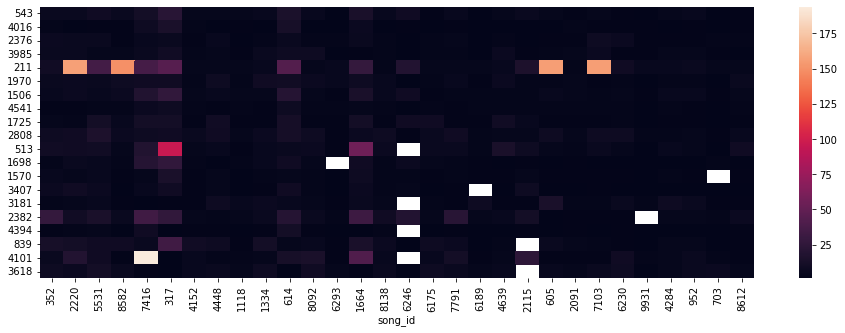

In [ ]:
#Use heatmap to visualize the above output i.e. the most played songs by most interacted users
figure = plt.figure(figsize=(16, 5))
sns.heatmap(most_played_songs_users_selected)
plt.show()

**Insights:**
- When there is no interaction between the user and the song, the box is black. As the number of plays increases between each user and song, the color of the box becomes less dark.
- The blank boxes correspond to the highest number of plays between a user and a song. For example, cases like users: 513,3181,4394,4101 plays many times song_id: 6246.
- With only 30 songs, we noticed that there are a large number of users without playing one of the songs. So, if we increase the number of songs, it is very possible that these black boxes will also increase. 

##Now, let's cluster each user using K-Means clustering with K chosen above. **We will add one column group with cluster labels to the most played songs data.**

In [ ]:
interaction_matrix.fillna(0, inplace=True)

predictions = KMeans(n_clusters=7, random_state=0).fit_predict(interaction_matrix) #Fit and predict using KMeans algorithm on the interaction matrix
results = pd.concat([most_played_songs, pd.DataFrame({'group':predictions})], axis=1) #Concatenate most played songs data and the predictions 
results

,352,2220,5531,8582,7416,317,4152,4448,1118,1334,614,8092,6293,1664,8138,6246,6175,7791,6189,4639,2115,605,2091,7103,6230,9931,4284,952,703,8612,sum_plays,group
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
1,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3,5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5
3,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,19.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,4,5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,7.0,5.0,3.0,NaN,NaN,1.0,2.0,1.0,3.0,NaN,4.0,NaN,NaN,2.0,NaN,1.0,4.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,2.0,NaN,1.0,18,5
4996,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4,5
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5


In [ ]:
#Check the count of users in each cluster
results['group'].value_counts()

5    4571
6     369
0      55
4       2
3       1
2       1
1       1
Name: group, dtype: int64

**Observations and Insights:**
- Cluster "5" contains the 91% of the total number of users. 
- Clusters "4", "3", "2" and "1" might contain a very specific taste/preference. 

**Let's visualize the biggest cluster and check how sparse or dense the cluster is. It would be difficult to visualize large clusters, so let's plot only 50 users and songs with most interactions.**

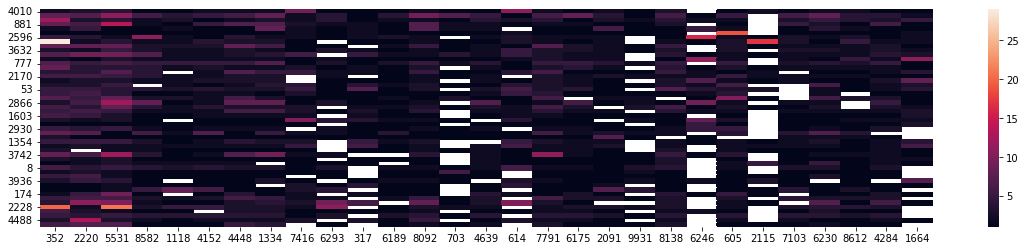

In [ ]:
cluster_number = 5
n_users = 50
n_songs = 30

#Filter the results dataframe to extract users in the cluster
cluster_5_predictions = results[results.group == cluster_number].drop(['group'],axis=1)
#Find top 50 songs with the most number of interactions
cluster_5_predictions = find_most_played_songs(cluster_5_predictions,n_songs)
#Finding top 50 users with the most number of interactions 
cluster_5_predictions = find_most_interacted_users(cluster_5_predictions,n_users)

#Visualize using heatmap
figure = plt.figure(figsize=(20,4))
sns.heatmap(cluster_5_predictions)

In [ ]:
cluster_5_predictions.fillna('').head()

,352,2220,5531,8582,1118,4152,4448,1334,7416,6293,317,6189,8092,703,4639,614,7791,6175,2091,9931,8138,6246,605,2115,7103,6230,8612,4284,1664
4010,2.0,3,4.0,1,1,2,2.0,2,9,1,1,1,2.0,1,1,11,2.0,1,2,1,3,,1,2,1,2,2,1,1
3297,8.0,7,11.0,6,4,5,6.0,8,2,4,1,4,9.0,7,5,1,6.0,8,4,1,6,1,5,,6,8,4,4,2
582,12.0,3,4.0,2,3,1,2.0,3,2,4,1,2,2.0,1,4,3,4.0,1,3,2,4,2,2,,3,5,4,3,5
881,8.0,6,14.0,2,1,5,7.0,7,3,2,2,1,7.0,2,2,1,2.0,2,1,1,3,,1,,5,3,1,6,1
1890,2.0,5,1.0,1,2,1,1.0,8,2,1,2,1,7.0,2,2,,1.0,1,6,1,1,5,2,,1,4,2,1,1


Now, let's recommend songs to a user from the chosen cluster. Let's select the user in cluster with most number of interactions

In [ ]:
find_most_interacted_users(cluster_5_predictions,1).index

Int64Index([4010], dtype='int64')

In [ ]:
#Cluster_5 songs predictions 
cluster_5_predictions.loc[4010, :]

352           2.0
2220          3.0
5531          4.0
8582          1.0
1118          1.0
4152          2.0
4448          2.0
1334          2.0
7416          9.0
6293          1.0
317           1.0
6189          1.0
8092          2.0
703           1.0
4639          1.0
614          11.0
7791          2.0
6175          1.0
2091          2.0
9931          1.0
8138          3.0
6246          NaN
605           1.0
2115          2.0
7103          1.0
6230          2.0
8612          2.0
4284          1.0
1664          1.0
sum_plays    28.0
Name: 4010, dtype: float64

In [ ]:
user_id = 4010
#Finding all the songs for user 4010
user_id_play  = cluster_5_predictions.loc[user_id, :]
#Finding unplayed songs for user 4010
user_id_unplayed_songs =  user_id_play[user_id_play.isnull()]
sum_play = pd.concat([user_id_unplayed_songs, cluster_5_predictions.sum()], axis=1, join='inner').loc[:,0]
sum_play = pd.DataFrame(sum_play.sort_values(ascending=False).reset_index())
sum_play.columns = ['song_id', 'sum_play']
song_name = df_small[df_small['song_id'].isin(user_id_unplayed_songs.index)][['song_id']].drop_duplicates().reset_index(drop=True)
song_name.merge(sum_play, on='song_id').sort_values(by='sum_play', ascending=False)

,song_id,sum_play
0,6246,96.0


In [ ]:
user_id = 881
#Finding all the songs for user 4010
user_id_play  = cluster_5_predictions.loc[user_id, :]
#Finding unplayed songs for user 4010
user_id_unplayed_songs =  user_id_play[user_id_play.isnull()]
sum_play = pd.concat([user_id_unplayed_songs, cluster_5_predictions.sum()], axis=1, join='inner').loc[:,0]
sum_play = pd.DataFrame(sum_play.sort_values(ascending=False).reset_index())
sum_play.columns = ['song_id', 'sum_play']
song_name = df_small[df_small['song_id'].isin(user_id_unplayed_songs.index)][['song_id']].drop_duplicates().reset_index(drop=True)
song_name.merge(sum_play, on='song_id').sort_values(by='sum_play', ascending=False)

,song_id,sum_play
1,6246,96.0
0,2115,50.0


**Observations and Insights:**
- From 7 clusters, we identified that the cluster with more similar users is cluster "5", but the amount of users is pretty high, so we decided to buit a heatmap in order to check how sparse or dense is that cluster.
- The blank boxes correspond to the highest number of plays between a user and a song.
- In the heatmap are a considerable number of users who plays song between 10 a 15 times.
- The user from the cluster "5" with most interactions is user_id: 4010.
- The song did not selected by user "4010" is song_id: 6246 and the sum of plays for this songs is 96 plays for the others users also from the same cluster. 

##**Content-Based Recommendation Systems**

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In content-based recommendation system, we would be using the feature - text. In this dataset, we don't have any song review but we can combine the columns - title, release, and artist_name to create a text-based feature and **apply tfidf feature extraction technique to extract features**, which we later use to compute similar songs based on these texts.

In [ ]:
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
0,75144,7416,1,Revelry,Only By The Night,Kings Of Leon,2008,Revelry Only By The Night Kings Of Leon
1,75144,8582,4,Use Somebody,Use Somebody,Kings Of Leon,2008,Use Somebody Use Somebody Kings Of Leon
2,75144,4152,2,The Scientist,The Scientist,Coldplay,2002,The Scientist The Scientist Coldplay
3,75144,1118,7,Clocks,A Rush Of Blood To The Head,Coldplay,2002,Clocks A Rush Of Blood To The Head Coldplay
4,75144,7103,1,Alejandro,The Fame Monster,Lady GaGa,2009,Alejandro The Fame Monster Lady GaGa


Now, we can keep only five columns - user_id, sing_id, play_count, title, and text. We will drop the duplicate titles from the data and make it the title column as the index of the dataframe

In [ ]:
df_small2 = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]
df_small3 = df_small2.drop_duplicates(subset=['title'])
df_small3 = df_small3.set_index('title')
df_small3.head()
#df_small = df_small.drop(['release','artist_name'], axis=1)
#df_small

,user_id,song_id,play_count,text
title,,,,
Revelry,75144,7416,1,Revelry Only By The Night Kings Of Leon
Use Somebody,75144,8582,4,Use Somebody Use Somebody Kings Of Leon
The Scientist,75144,4152,2,The Scientist The Scientist Coldplay
Clocks,75144,1118,7,Clocks A Rush Of Blood To The Head Coldplay
Alejandro,75144,7103,1,Alejandro The Fame Monster Lady GaGa


In [ ]:
#Checking first five indices
indices = pd.Series(df_small3.index)
indices.head()

0          Revelry
1     Use Somebody
2    The Scientist
3           Clocks
4        Alejandro
Name: title, dtype: object

**Insights**
- We will try to build a model, based on the available features, as "release" and artist_name, those features explain the observed user-item interactions.
- We will later look for similarities between users based on these implicit features from the data. (songs of the same album or artist, artist of the same genre,etc)

In [ ]:
!pip install nltk

In [ ]:
import re
import nltk
#download all the nltk packages required here
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


We will create a function to **pre-process the text data:**

**Stopwords:** A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that does not contain information in the text and can be ignored.
**Lemmatization:** Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analyzed as a single item. For example, runs, running, ran are all forms of the word run, therefore run is the lemma of all these words.

In [ ]:
#Build the function to preprocess the data
def tokenize(text):
    
    #Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ",text.lower())
    
    #Extracting each word in the text
    tokens = word_tokenize(text)
    
    #Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]
    
    #Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

##**Feature Extraction**

In [ ]:
#Apply TF-IDF transformation on the text column using the function defined above
tfidf = TfidfVectorizer(tokenizer=tokenize)
song_tfidf = tfidf.fit_transform(df_small3['text'].values).toarray()

In [ ]:
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7182,7183,7184,7185,7186,7187,7188,7189,7190,7191,7192,7193,7194,7195,7196,7197,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214,7215,7216,7217,7218,7219,7220,7221
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Comments:**
We have extracted 7222 features from the text data. 

In [ ]:
#Now, we can find similarities between songs using these features. We will use cosine similarity to calculate the similarity.
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

array([[1.       , 0.2291855, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.2291855, 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]])

Finally, let's create a function to find most similar songs to recommend for a given song

In [ ]:
# Create a function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    indices = pd.Series(df_small3.index)
    
    # getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # getting the indices of 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small3.index)[i])
        
    return recommended_songs

**Recommend top songs similar to some song**

In [ ]:
#Recommend songs using the function defined above
recommendations('Clocks', similar_songs)

[20, 397, 293, 1381, 99, 1367, 88, 95, 1403, 1171]


['In My Place',
 'A Whisper',
 'Amsterdam',
 'Daylight',
 'Politik',
 'Warning Sign',
 'A Rush Of Blood To The Head',
 'God Put A Smile Upon Your Face',
 'Such A Rush',
 'Clock']

**Verify that all songs recommended have something in common**: Words in common by artist name, album
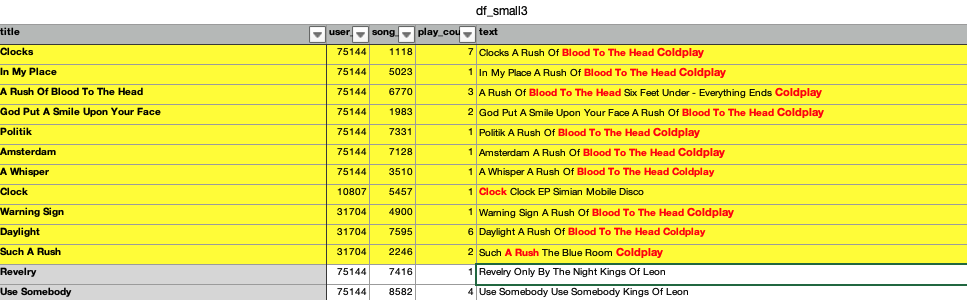
 

In [ ]:
#Recommend songs using the function defined above
recommendations('Use Somebody', similar_songs)

[1041, 1212, 4667, 538, 2523, 35, 363, 2524, 3556, 75]


['Be Somebody',
 'Use It',
 'Everybody Be Somebody',
 'Somebody To Love',
 'Live And Let Die',
 'Somebody Told Me',
 'Somebody (Loves You) (Explicit Album Version)',
 'Civil War',
 'Are You That Somebody? ( LP Version )',
 'I Want You']

In [ ]:
df_small3.to_csv('df_small3.csv',index='false')

**Final Proposal**
I will add Content Based Filtering model to a Collaborative filtering model, so I will get an hybrid recommendation system model.
How it will works: I search for a song to listen and then, the system will first filter songs that have similar features, based on keywords, with the song I am listening to at that moment. Then, considering that first filter, the algorithm will filter again based on similar preferences between the song I am listening to and songs that other users have played.

**How to ensemble**
Get the top 10 songs Content based filtering,then get the top 10 Collaborative filtering recommendations and combine the results by song_id.


##**Conclusion and Recommendations:**
1. What are the most meaningful insights from the data relevant to the problem?

- The most played songs and the users with the most interaction on the platform
- Reduce the original data to a dataset based on the most amount of interactions.
- Focus on the design of a interactions matrix between user and item, this matrix is very important for similarity or model based collaborative filtering.
- In order to identify preferences (user profile) the data must be grouped by clusters.
- Having certain features for an user or/and an item, can help to infer behaviors, preferences or similarities and thus gives us a better recommendation to future users.

2. How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
- Popularity technique is focus on recommend songs based on a top or rank of songs. This technique gives us recommendations for new items or new users.
- Content based works with the idea that if a user plays "x" song, then that same user will also like a "similar" song.
- Build a personalize playlist to each user is the way of Molde based collaborative filtering works.
- From Cluster based, we cluster similar users together and recommend songs to a user based on preferences from other users in the same cluster.
- Building a model using matrix factorization (SVD) got us a low RMSE and allowed us to work with latente features, therefore obtain less sparsity.
- Although clustering users on the basis of similarities, data still sparse or dense.

